### Tried KNN NB and LR model - same score, unable to come to colusion on feature selection from scatter plot
## min max scaler, standard scaler also did not make difference 
## feature selection tried to remove few columns at random just by obeservation from plots to check if score increases but doesnt happen

In [177]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [178]:
df=pd.read_csv('Cellphone.csv')

In [179]:
df[:10]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [180]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

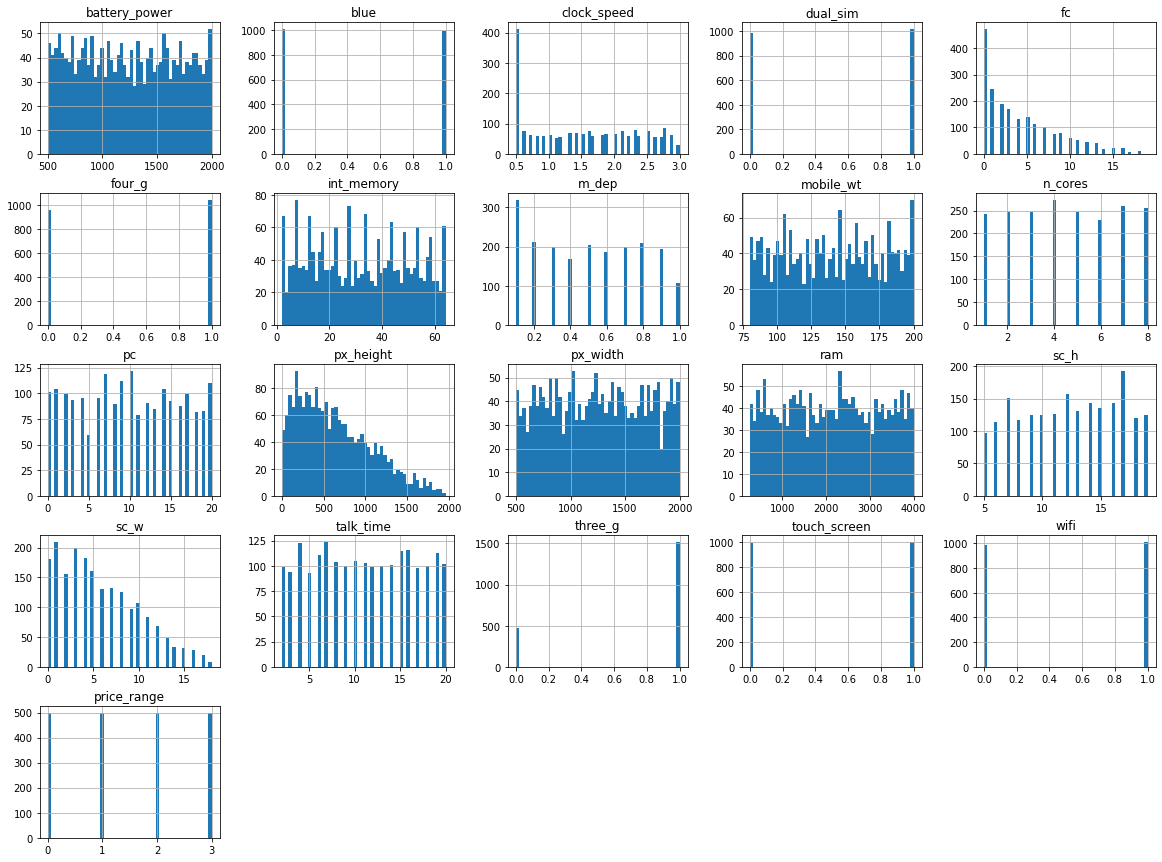

In [21]:
df.hist(bins=50,figsize=(20,15))
plt.show()

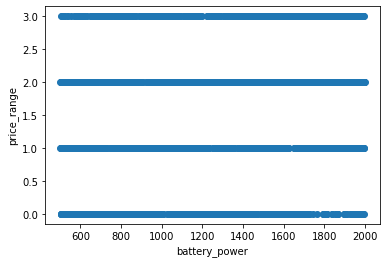

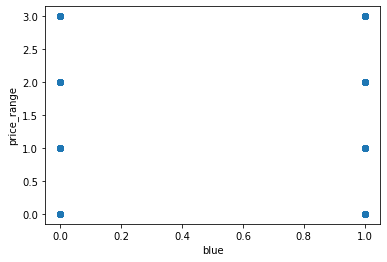

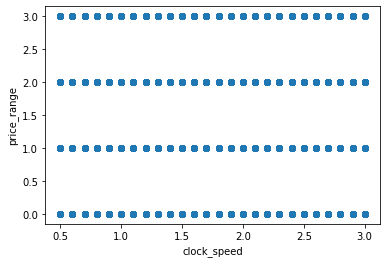

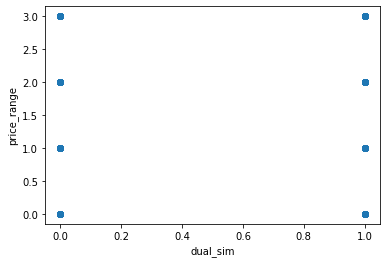

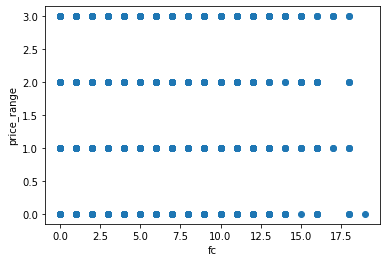

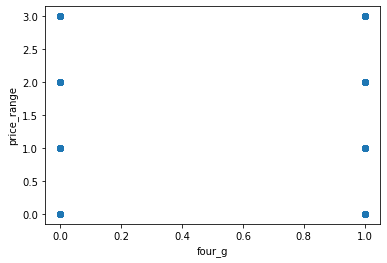

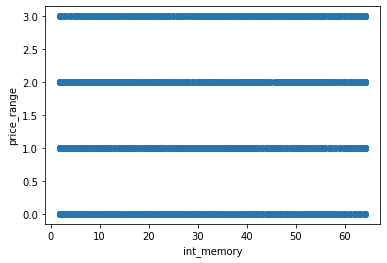

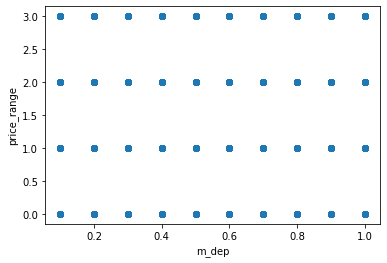

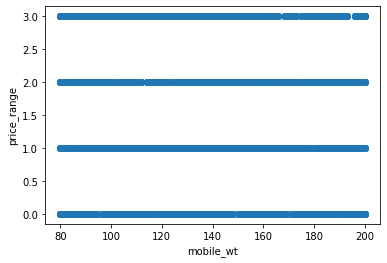

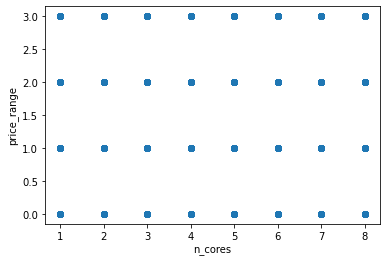

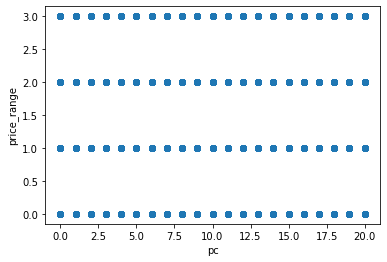

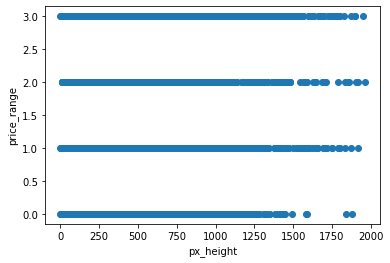

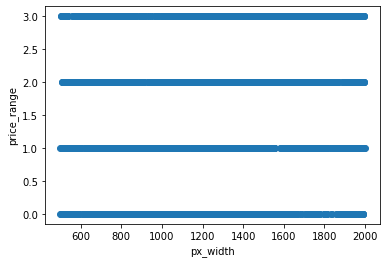

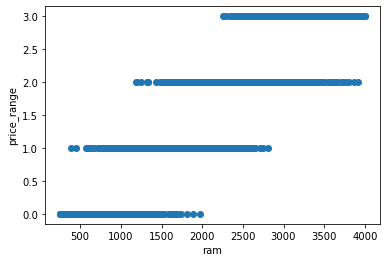

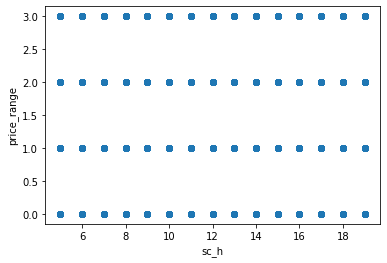

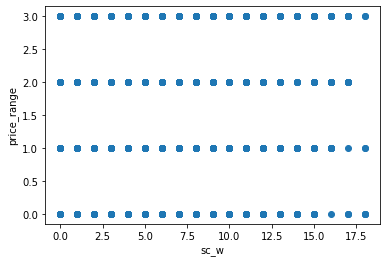

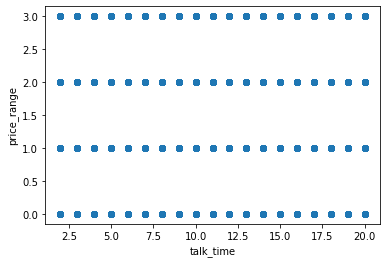

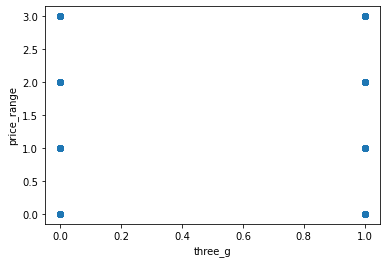

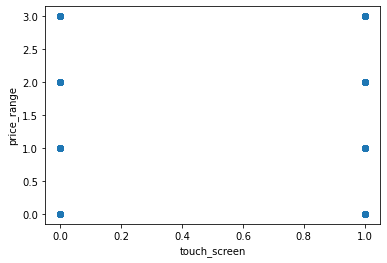

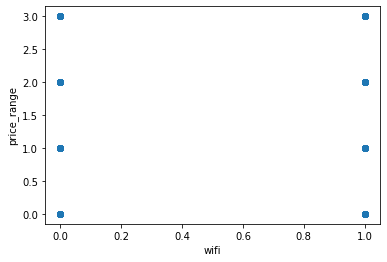

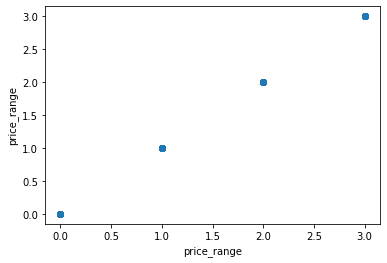

In [67]:
for i in df.columns:
    plt.xlabel(i)
    plt.ylabel('price_range')
    plt.scatter(x=df[i],y=df['price_range'])
    plt.show()

In [191]:
X=df.iloc[:,:-1]
Y=df.loc[:,['price_range']]

#Y=df[[col for col in df.columns if col not in ['price_range']]]
Y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [175]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler=StandardScaler()
standard_x=scaler.fit_transform(x_train)
standard_x_test=scaler.fit_transform(x_test)

([<matplotlib.axis.XTick at 0x1c8b2a2cbe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

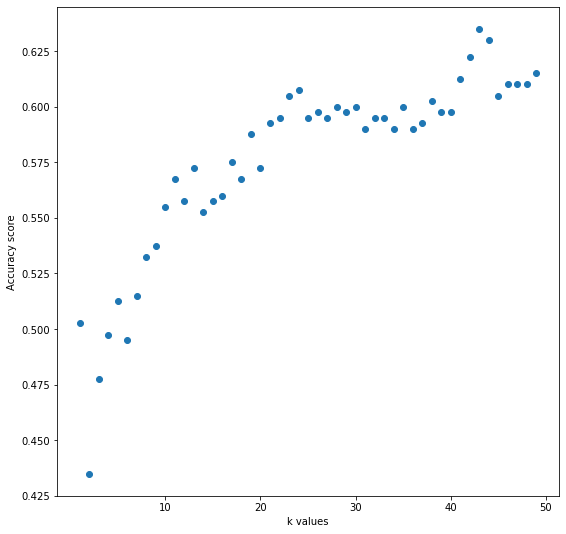

In [176]:
k_range = range(1,50)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(standard_x, y_train)
    score.append(knn.score(standard_x_test, y_test))
    
plt.figure(figsize = (9, 9))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([10, 20, 30, 40, 50])

In [167]:
model=LogisticRegression()
model.fit(standard_x,y_train)

LogisticRegression()

In [168]:
y_predict=model.predict(standard_x_test)

In [169]:
score=accuracy_score(y_predict,y_test)

In [170]:
score

0.9525